# 2.1 Gráfico de barras por região

In [3]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(__file__), '../../') if '__file__' in globals() else '../../')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from src.util import dados_limpos

regiao                         int64
rusticos                      object
improvisados                   int64
habitacao_precaria             int64
comodos                        int64
unidade_convivente_deficit     int64
coabitacao                     int64
onus                           int64
deficit_habitacional           int64
dtype: object
   regiao      rusticos  improvisados  habitacao_precaria  comodos  \
0       1         Norte        116993              214269   331262   
1       2      Nordeste        272979              430277   703256   
2       3       Sudeste         51918              284993   336911   
3       4           Sul        125881               67483   193364   
4       5  Centro-Oeste          3777               80090   117860   

   unidade_convivente_deficit  coabitacao    onus  deficit_habitacional  
0                       16922      240480  257402                184665  
1                       17606      348848  366454                691322  
2         

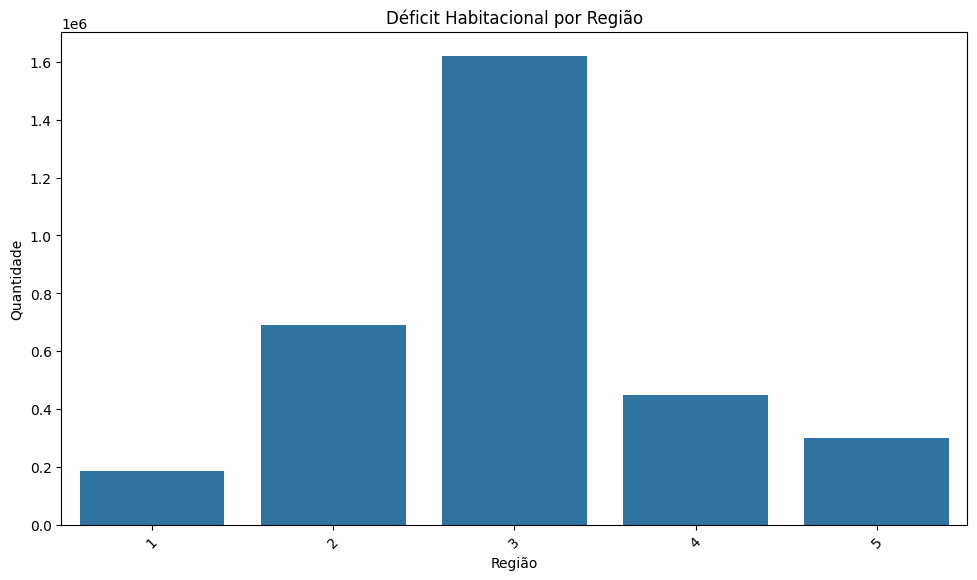

In [4]:
df = pd.read_csv("../../data/raw/DH_2022_Br_Regioes_20240423.xlsx - Total.csv")
df_atualizado = dados_limpos(df)

plt.figure(figsize=(10, 6))
plt.title("Déficit Habitacional por Região")
plt.ylabel("Quantidade")
plt.xlabel("Região")
plt.xticks(rotation=45)
plt.tight_layout()
sns.barplot(data = df_atualizado, x="regiao", y="deficit_habitacional")
plt.show()